# language hackathon 


Rookaya Madari

In [185]:
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Import ML libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

# Imports for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Imports for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Import csv file for submission
import csv

In [73]:
# Extract the test data
test_df = pd.read_csv (r"C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\test_set.csv")
print (test_df)

      index                                               text
0         1  Mmasepala, fa maemo a a kgethegileng a letlele...
1         2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2         3         Tshivhumbeo tshi fana na ngano dza vhathu.
3         4  Kube inja nelikati betingevakala kutsi titsini...
4         5                      Winste op buitelandse valuta.
...     ...                                                ...
5677   5678                   You mark your ballot in private.
5678   5679  Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679   5680  E Ka kopo etsa kgetho ya hao ka hloko, hobane ...
5680   5681  TB ke bokudi ba PMB, mme Morero o tla lefella ...
5681   5682              Vakatjhela iwebhusayidi yethu ku-www.

[5682 rows x 2 columns]


In [74]:
# Extract the training data
train_df = pd.read_csv (r"C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\train_set.csv")
print (train_df)

      lang_id                                               text
0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2         eng  the province of kwazulu-natal department of tr...
3         nso  o netefatša gore o ba file dilo ka moka tše le...
4         ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
...       ...                                                ...
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...
32997     eng  closing date for the submission of completed t...
32998     xho  nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999     sot  mafapha a mang le ona a lokela ho etsa ditlale...

[33000 rows x 2 columns]


# DATA PREPROCESSING 

In [75]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [76]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [77]:
# Function to remove punctuations from text
def remove_punctuation(text):
    return ''.join([l for l in text.encode(encoding="ascii",errors="ignore").decode("ascii") if l not in string.punctuation])

In [78]:
# Remove punctuations from training data text
train_df['text'] = train_df['text'].apply(remove_punctuation)
train_df.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefata gore o ba file dilo ka moka te le d...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [79]:
# Convert training data to lower case, to allow for case insenstive words
train_df['text'] = train_df['text'].str.lower()
train_df.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefata gore o ba file dilo ka moka te le d...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [80]:
# Tokenize the training data words
tokeniser = TreebankWordTokenizer()
train_df['token'] = train_df['text'].apply(tokeniser.tokenize)
train_df.head()

,lang_id,text,token
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefata gore o ba file dilo ka moka te le d...,"[o, netefata, gore, o, ba, file, dilo, ka, mok..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [81]:
# Remove punctuations from test data text
test_df['text'] = test_df['text'].apply(remove_punctuation)
test_df.head()

,index,text
0,1,Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta


In [82]:
# Convert test data to lower case, to allow for case insenstive words
test_df['text'] = test_df['text'].str.lower()
test_df.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [83]:
# Tokenize the test data words
test_df['token'] = test_df['text'].apply(tokeniser.tokenize)
test_df.head()

,index,text,token
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]"


In [101]:
# Create a language dictionary from the training data, with unique words array as value and language as key
lang_dict = {}
train_df.head()
for row in train_df.iterrows():
    new_words = set()
    new_words.update([word for word in row[1][2]])
    if (row[1][0] in lang_dict):
        new_words.update(lang_dict[row[1][0]])
    lang_dict[row[1][0]] = new_words

In [103]:
# Print key and unqiue word count per language
for key in lang_dict:
    print(key)
    print(len(lang_dict[key]))

xho
25348
eng
10038
nso
10581
ven
7974
tsn
10913
nbl
21014
zul
26895
ssw
23821
tso
8904
sot
9678
afr
12313


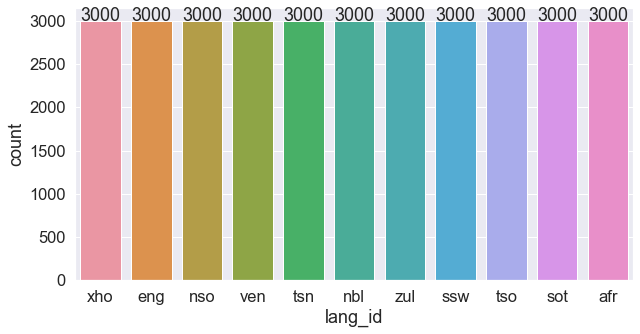

In [104]:
# Countplot for each row, showing the data is balanced in the training set for all languages
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='lang_id', data=train_df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [105]:
# Create columns for each language in the training data, showing likely count per language of words
for key in lang_dict:
    train_df[key] = np.nan
    for index, row in train_df.iterrows():
        train_df.loc[index, key] = len([w for w in row[2] if w in lang_dict[key]])
train_df.head()

,lang_id,text,token,xho,eng,nso,ven,tsn,nbl,zul,ssw,tso,sot,afr
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...",24.0,0.0,1.0,1.0,1.0,11.0,12.0,2.0,2.0,1.0,1.0
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...",31.0,2.0,1.0,2.0,1.0,14.0,16.0,9.0,2.0,1.0,2.0
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...",12.0,37.0,14.0,12.0,16.0,15.0,16.0,13.0,11.0,16.0,16.0
3,nso,o netefata gore o ba file dilo ka moka te le d...,"[o, netefata, gore, o, ba, file, dilo, ka, mok...",14.0,16.0,40.0,18.0,25.0,13.0,13.0,14.0,18.0,17.0,13.0
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",20.0,7.0,14.0,43.0,18.0,12.0,15.0,20.0,22.0,16.0,7.0


In [106]:
# Create columns for each language in the test data, showing likely count per language of words
for key in lang_dict:
    test_df[key] = np.nan
    for index, row in test_df.iterrows():
        test_df.loc[index, key] = len([w for w in row[2] if w in lang_dict[key]])
test_df.head()

,index,text,token,xho,eng,nso,ven,tsn,nbl,zul,ssw,tso,sot,afr
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",3.0,4.0,8.0,4.0,10.0,3.0,3.0,3.0,4.0,8.0,3.0
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",2.0,0.0,0.0,0.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",1.0,1.0,2.0,7.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0


In [121]:
# Acquire test and training data
train_data = train_df.to_numpy()
test_data = test_df.to_numpy()
X_train = train_data[:, 3:14]
y_train = train_data[:, [0]].ravel()
X_test = test_data[:, 3:14]

In [140]:
# Build models

# DecisionTreeClassifier Model
dtc = DecisionTreeClassifier()

# RandomForestClassifier Model
rfc = RandomForestClassifier()

# Linear SVC Model
# lsvc = LinearSVC()

# Logistic Regression Model
# lr = LogisticRegression()

# SGD Classifier Model
sgd = SGDClassifier()

# Support Vector Classifier Model
svc = SVC()

# Ridge Classifier Model
rc = RidgeClassifier()

In [141]:
# Fit data
dtc.fit(X_train, y_train)

rfc.fit(X_train, y_train)

# lsvc.fit(X_train, y_train)

# lr.fit(X_train, y_train)

sgd.fit(X_train, y_train)

svc.fit(X_train, y_train)

rc.fit(X_train, y_train)

RidgeClassifier()

In [142]:
# Predictions
y_pred_dtc = dtc.predict(X_test)

y_pred_rfc = rfc.predict(X_test)

y_pred_sgd = sgd.predict(X_test)

y_pred_svc = svc.predict(X_test)

y_pred_rc = rc.predict(X_test)

In [143]:
print(y_pred_dtc)

['xho' 'xho' 'xho' ... 'sot' 'sot' 'xho']


In [144]:
print(y_pred_rfc)

['afr' 'nbl' 'ven' ... 'sot' 'sot' 'nbl']


In [145]:
print(y_pred_sgd)

['ssw' 'nbl' 'ven' ... 'sot' 'sot' 'afr']


In [146]:
print(y_pred_svc)

['afr' 'nbl' 'nbl' ... 'sot' 'sot' 'nbl']


In [147]:
print(y_pred_rc)

['tsn' 'nbl' 'ven' ... 'sot' 'sot' 'nbl']


In [161]:
# open the file in the write mode
with open(r'C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\submission_rc.csv', 'w', newline='', encoding='utf-8') as f:  
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(["index", "lang_id"])
    
    # write predicted data
    for index, row in enumerate(y_pred_rc):
        writer.writerow([str(index+1), row])
    # close the file
    f.close()

In [162]:
# open the file in the write mode
with open(r'C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\submission_svc.csv', 'w', newline='', encoding='utf-8') as f:  
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(["index", "lang_id"])
    
    # write predicted data
    for index, row in enumerate(y_pred_svc):
        writer.writerow([str(index+1), row])
    # close the file
    f.close()

In [163]:
# open the file in the write mode
with open(r'C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\submission_sgd.csv', 'w', newline='', encoding='utf-8') as f:  
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(["index", "lang_id"])
    
    # write predicted data
    for index, row in enumerate(y_pred_sgd):
        writer.writerow([str(index+1), row])
    # close the file
    f.close()

In [164]:
# open the file in the write mode
with open(r'C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\submission_rfc.csv', 'w', newline='', encoding='utf-8') as f:  
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(["index", "lang_id"])
    
    # write predicted data
    for index, row in enumerate(y_pred_rfc):
        writer.writerow([str(index+1), row])
    # close the file
    f.close()

In [165]:
# open the file in the write mode
with open(r'C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\submission_dtc.csv', 'w', newline='', encoding='utf-8') as f:  
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(["index", "lang_id"])
    
    # write predicted data
    for index, row in enumerate(y_pred_dtc):
        writer.writerow([str(index+1), row])
    # close the file
    f.close()

In [180]:
# Hyper parameter tuning for Ridge classifier
parameters = {'alpha':[100,10,1,0.1,0.01,0.001,0.0001,0], 'solver': ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}

# define the grid search
ridge_reg = GridSearchCV(rc, parameters)

#fit the grid search
ridge_reg.fit(X_train, y_train)

# best estimator
print(ridge_reg.best_estimator_)

RidgeClassifier(alpha=100)


In [181]:
# Retrain model with best hyper parameters and fit
tuned_rc = ridge_reg.best_estimator_
tuned_rc.fit(X_train, y_train)

RidgeClassifier(alpha=100)

In [183]:
# Predict the tuned results of test set
y_pred_tuned_100_rc = tuned_rc.predict(X_test)

In [184]:
# open the file in the write mode to write tuned data
with open(r'C:\Users\rooka\Desktop\explore trains\Classification\south-african-language-identification-2021\submission_tuned_100_rc.csv', 'w', newline='', encoding='utf-8') as f:  
    # create the csv writer
    writer = csv.writer(f)
    writer.writerow(["index", "lang_id"])
    
    # write predicted data
    for index, row in enumerate(y_pred_tuned_100_rc):
        writer.writerow([str(index+1), row])
    # close the file
    f.close()